# 🚀 JobHunt Feature Engineering Pipeline

This notebook provides a comprehensive demonstration of the JobHunt feature engineering pipeline.

## 📋 **What This Notebook Covers:**

### 🔧 **Individual Module Testing:**
- **Qualifications**: Classification into Bachelor/Master/PhD categories
- **Work Types**: Standardization into Contract/Part-time/Internship/Full-time
- **Experience**: Parsing text ranges into numerical min/max/mid values
- **Salary**: Converting salary ranges into structured numerical features
- **Text Processing**: Combining and cleaning role, job title, and skills

### 🏗️ **Complete Pipeline:**
- Full `FeatureEngineeringPipeline` demonstration
- Real dataset processing
- Feature statistics and analysis
- Data quality assessment

### 📊 **Analysis & Visualization:**
- Feature distribution plots
- Statistical summaries
- Data completeness analysis
- Export processed features


## 1. Setup and Imports

In [2]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)

# Set plotting style
plt.style.use('default')
sns.set_palette('husl')

print('✅ Standard libraries imported successfully!')

✅ Standard libraries imported successfully!


In [3]:
# Import feature engineering modules
import sys
from pathlib import Path

# Get the project root (JobHunt) and ai_model directory
current_dir = Path.cwd()
print(current_dir)
if current_dir.name == 'notebooks':
    ai_model_dir = current_dir.parent  # this is ai_model
else:
    ai_model_dir = current_dir

# Add ai_model directory to Python path
if str(ai_model_dir) not in sys.path:
    sys.path.insert(0, str(ai_model_dir))

print(f'✅ Added to Python path: {ai_model_dir}')
print(f'✅ feature_engineering directory exists: {(ai_model_dir / "feature_engineering").exists()}')

# Import the main pipeline and individual functions
from feature_engineering import (
    FeatureEngineeringPipeline,
    classify_qualification,
    process_qualifications,
    standardize_work_type,
    process_work_types,
    parse_experience_range,
    process_experience,
    parse_salary_range,
    process_salary,
    clean_and_combine_text,
    process_text_features
)

print('✅ Feature engineering modules imported successfully!')


d:\ai courses\JobHunt\ai_model\notebooks
✅ Added to Python path: d:\ai courses\JobHunt\ai_model
✅ feature_engineering directory exists: True
✅ Feature engineering modules imported successfully!


In [4]:
def create_comprehensive_visualizations(df, qual_analysis, worktype_analysis, cross_analysis):
    """Create comprehensive visualizations for EDA insights"""
    print("="*80)
    print("📈 COMPREHENSIVE DATA VISUALIZATIONS")
    print("="*80)
    
    # Set up the plotting environment
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=(20, 24))
    
    # 1. Data Completeness Heatmap
    plt.subplot(4, 2, 1)
    missing_data = df.isnull()
    sns.heatmap(missing_data.T, cbar=True, cmap='RdYlBu_r', 
                xticklabels=False, yticklabels=True)
    plt.title('Data Completeness Heatmap\n(Yellow = Missing, Blue = Present)', fontsize=14, fontweight='bold')
    plt.ylabel('Columns')
    
    # 2. Missing Data Percentage
    plt.subplot(4, 2, 2)
    missing_pct = (df.isnull().sum() / len(df)) * 100
    missing_pct = missing_pct.sort_values(ascending=True)
    colors = ['red' if x > 50 else 'orange' if x > 20 else 'green' for x in missing_pct]
    missing_pct.plot(kind='barh', color=colors)
    plt.title('Missing Data Percentage by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Missing Percentage (%)')
    plt.grid(axis='x', alpha=0.3)
    
    # 3. Qualifications Distribution (if available)
    if qual_analysis:
        plt.subplot(4, 2, 3)
        first_qual_col = list(qual_analysis.keys())[0]
        qual_counts = qual_analysis[first_qual_col]['counts'].head(10)
        qual_counts.plot(kind='bar', color='skyblue', edgecolor='navy')
        plt.title(f'Top 10 Qualifications Distribution\n({first_qual_col})', fontsize=14, fontweight='bold')
        plt.xlabel('Qualifications')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
    
    # 4. Work Types Distribution (if available)
    if worktype_analysis:
        plt.subplot(4, 2, 4)
        first_worktype_col = list(worktype_analysis.keys())[0]
        worktype_counts = worktype_analysis[first_worktype_col]['counts']
        colors_wt = plt.cm.Set3(np.linspace(0, 1, len(worktype_counts)))
        worktype_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors_wt, startangle=90)
        plt.title(f'Work Types Distribution\n({first_worktype_col})', fontsize=14, fontweight='bold')
        plt.ylabel('')
    
    # 5. Qualification Text Length Distribution (if available)
    if qual_analysis:
        plt.subplot(4, 2, 5)
        first_qual_col = list(qual_analysis.keys())[0]
        text_lengths = qual_analysis[first_qual_col]['text_lengths']
        plt.hist(text_lengths, bins=30, color='lightcoral', edgecolor='darkred', alpha=0.7)
        plt.title('Qualification Text Length Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Text Length (characters)')
        plt.ylabel('Frequency')
        plt.axvline(text_lengths.mean(), color='red', linestyle='--', 
                   label=f'Mean: {text_lengths.mean():.1f}')
        plt.legend()
    
    # 6. Work Type Text Length Distribution (if available)
    if worktype_analysis:
        plt.subplot(4, 2, 6)
        first_worktype_col = list(worktype_analysis.keys())[0]
        worktype_text_lengths = worktype_analysis[first_worktype_col]['text_lengths']
        plt.hist(worktype_text_lengths, bins=20, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
        plt.title('Work Type Text Length Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Text Length (characters)')
        plt.ylabel('Frequency')
        plt.axvline(worktype_text_lengths.mean(), color='red', linestyle='--',
                   label=f'Mean: {worktype_text_lengths.mean():.1f}')
        plt.legend()
    
    # 7. Data Completeness Overview
    plt.subplot(4, 2, 7)
    if cross_analysis:
        completeness_data = [
            cross_analysis['both_present_count'],
            cross_analysis['qual_only_count'],
            cross_analysis['worktype_only_count'],
            cross_analysis['neither_count']
        ]
        labels = ['Both Present', 'Qual Only', 'WorkType Only', 'Neither']
        colors_comp = ['green', 'orange', 'blue', 'red']
        
        plt.pie(completeness_data, labels=labels, autopct='%1.1f%%', 
                colors=colors_comp, startangle=90)
        plt.title('Data Completeness Overview\n(Qualification vs Work Type)', fontsize=14, fontweight='bold')
    
    # 8. Dataset Overview Statistics
    plt.subplot(4, 2, 8)
    plt.axis('off')
    
    # ---- FIX: compute safe values before f-string ----
    qual_unique = f"{qual_analysis[list(qual_analysis.keys())[0]]['unique_count']:,}" if qual_analysis else "N/A"
    worktype_unique = f"{worktype_analysis[list(worktype_analysis.keys())[0]]['unique_count']:,}" if worktype_analysis else "N/A"
    overlap = f"{cross_analysis['overlap_percentage']:.1f}%" if cross_analysis else "N/A"
    
    summary_text = f"""
📊 DATASET OVERVIEW

Total Records: {len(df):,}
Total Columns: {len(df.columns)}
Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

📋 DATA QUALITY
Complete Records: {(~df.isnull().any(axis=1)).sum():,}
Records with Missing: {df.isnull().any(axis=1).sum():,}

🎯 KEY INSIGHTS
• Unique Qualifications: {qual_unique}
• Unique Work Types: {worktype_unique}
• Data Overlap: {overlap}
"""
    
    plt.text(0.1, 0.9, summary_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.suptitle('JobHunt Dataset - Comprehensive Exploratory Data Analysis', 
                 fontsize=18, fontweight='bold', y=0.98)
    
    plt.show()
    
    print("✅ Comprehensive visualizations created successfully!")

## 2. Load Dataset

In [5]:
# Try to load the actual dataset
dataset_path = Path('../../dataset/job_descriptions_100k_sample.csv')
print(dataset_path)
if dataset_path.exists():
    print(f'📁 Loading dataset from: {dataset_path}')
    df = pd.read_csv(dataset_path)
    print(f'✅ Dataset loaded successfully!')
    print(f'📊 Dataset shape: {df.shape}')
    print(f'📋 Columns: {list(df.columns)}')
else:
    print('⚠️ Dataset not found. Creating sample data for demonstration...')
    

# Display basic info
print('\n📋 Dataset Info:')
print(df.info())
print('\n📊 First 5 rows:')
df.head()

..\..\dataset\job_descriptions_100k_sample.csv
📁 Loading dataset from: ..\..\dataset\job_descriptions_100k_sample.csv
✅ Dataset loaded successfully!
📊 Dataset shape: (100000, 23)
📋 Columns: ['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile']

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Job Id            100000 non-null  int64  
 1   Experience        100000 non-null  object 
 2   Qualifications    100000 non-null  object 
 3   Salary Range      100000 non-null  object 
 4   location          100000 non-null  object 
 5   Country          

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,731217710221434,1 to 9 Years,B.Com,$59K-$105K,Bissau,Guinea-Bissau,11.8037,-15.1804,Intern,56276,2023-04-24,Male,Justin Turner,525.904.3659,IT Support Specialist,IT Systems Administrator,Jobs2Careers,IT Systems Administrators manage and maintain ...,"{'Casual Dress Code, Social and Recreational A...",Network administration System and server maint...,"Administer and maintain IT systems, servers, a...",Bharat Electronics Limited,"{""Sector"":""Electronics"",""Industry"":""Electronic..."
1,117274981913427,2 to 14 Years,M.Com,$61K-$106K,Palikir,"Micronesia, Fed. Sts.",7.4256,150.5508,Intern,73167,2022-03-21,Male,Sarah Davis,(235)305-5348x40620,Java Developer,Java Backend Developer,Jobs2Careers,Java Backend Developers specialize in building...,"{'Employee Assistance Programs (EAP), Tuition ...",Backend development RESTful APIs Database inte...,Develop server-side applications and APIs usin...,Autoliv,"{""Sector"":""Automotive"",""Industry"":""Motor Vehic..."
2,1223957703158372,5 to 11 Years,MBA,$58K-$121K,Mexico City,Mexico,23.6345,-102.5528,Intern,85065,2023-04-07,Male,Rachel Kim,+1-673-276-6953x56364,Digital Marketing Specialist,Email Marketing Specialist,Jobs2Careers,Email Marketing Specialists design and execute...,"{'Childcare Assistance, Paid Time Off (PTO), R...","Email marketing platforms (e.g., Mailchimp, Co...","Plan and execute email marketing campaigns, in...",Titan Company,"{""Sector"":""Consumer Goods"",""Industry"":""Jewelry..."
3,2820360512579168,4 to 8 Years,MCA,$62K-$102K,Apia,Samoa,-13.7590,-172.1046,Intern,78831,2023-03-18,Male,Susan Navarro,+1-912-629-7264x430,Physician Assistant,Surgical Physician Assistant,Jobs2Careers,"Assist surgeons in the operating room, perform...","{'Life and Disability Insurance, Stock Options...",Surgical procedures and techniques Operating r...,"Assist surgeons in the operating room, includi...",Adidas AG,"{""Sector"":""Apparel and Footwear"",""Industry"":""A..."
4,2675139962258067,0 to 14 Years,B.Tech,$59K-$83K,Antananarivo,Madagascar,-18.8792,46.8451,Intern,55698,2022-04-05,Male,Darrell Freeman,389.243.9156x241,Data Engineer,ETL Developer,Jobs2Careers,An ETL Developer specializes in designing and ...,"{'Transportation Benefits, Professional Develo...","ETL (Extract, Transform, Load) processes Data ...","Extract, transform, and load (ETL) data from v...",Devon Energy,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."


## 3. Individual Module Testing

Let's test each feature engineering module individually to understand their functionality.

### 3.1 Qualifications Processing

In [7]:
print('🎓 QUALIFICATIONS PROCESSING')
print('=' * 50)

# Test individual classification
test_qualifications = [
    'Bachelor of Science',
    'Master of Arts',
    'PhD in Computer Science',
    'High School Diploma',
    None
]

print('Individual classification examples:')
for qual in test_qualifications:
    category = classify_qualification(qual)
    print(f'  {qual} → {category}')

# Check if df is defined, if not create sample data
if 'df' not in locals() or df is None:
    print('\n⚠️ Dataset not loaded. Creating sample qualifications data...')
    sample_qualifications = pd.Series([
        'Bachelor of Science in Computer Science',
        'Master of Business Administration',
        'PhD in Data Science',
        'Bachelor of Arts in Psychology',
        'Master of Science in Engineering',
        'High School Diploma',
        'Associate Degree',
        None,
        'Bachelor of Engineering',
        'Master of Arts in Literature'
    ])
    qual_features = process_qualifications(sample_qualifications)
    print('\n📊 Sample qualifications processed:')
else:
    # Process full series from loaded dataset
    print('\nProcessing qualifications from dataset:')
    qual_features = process_qualifications(df['Qualifications'])

print(f'Generated features: {list(qual_features.columns)}')
print('\nQualification features preview:')
qual_features.head()

🎓 QUALIFICATIONS PROCESSING
Individual classification examples:
  Bachelor of Science → Bachelor
  Master of Arts → Master
  PhD in Computer Science → PhD
  High School Diploma → Other
  None → Other

Processing qualifications from dataset:
Generated features: ['qualification_category', 'is_bachelor', 'is_master', 'is_phd', 'has_qualification']

Qualification features preview:


,qualification_category,is_bachelor,is_master,is_phd,has_qualification
0,Bachelor,1,0,0,1
1,Master,1,1,0,1
2,Master,1,1,0,1
3,Master,1,1,0,1
4,Bachelor,1,0,0,1


### 3.2 Work Type Processing

In [8]:
print('💼 WORK TYPE PROCESSING')
print('=' * 50)

# Test individual standardization
test_work_types = [
    'Full Time',
    'Contract',
    'Part-time',
    'Internship',
    'Freelance'
]

print('Individual standardization examples:')
for wt in test_work_types:
    standardized = standardize_work_type(wt)
    print(f'  {wt} → {standardized}')

# Check if df is defined, if not create sample data
if 'df' not in locals() or df is None:
    print('\n⚠️ Dataset not loaded. Creating sample work type data...')
    sample_work_types = pd.Series([
        'Full Time',
        'Part-time',
        'Contract',
        'Internship',
        'Freelance',
        'Remote',
        'Hybrid',
        'Temporary',
        'Full-Time',
        'Part Time'
    ])
    worktype_features = process_work_types(sample_work_types)
    print('\n📊 Sample work types processed:')
else:
    # Process full series from loaded dataset
    print('\nProcessing work types from dataset:')
    worktype_features = process_work_types(df['Work Type'])

print(f'Generated features: {list(worktype_features.columns)}')
print('\nWork type features preview:')
worktype_features.head()

💼 WORK TYPE PROCESSING
Individual standardization examples:
  Full Time → None
  Contract → None
  Part-time → None
  Internship → None
  Freelance → None

Processing work types from dataset:
Generated features: ['work_type_category', 'is_contract', 'is_part_time', 'is_internship', 'is_full_time', 'has_work_type']

Work type features preview:


,work_type_category,is_contract,is_part_time,is_internship,is_full_time,has_work_type
0,None,0,0,0,0,1
1,None,0,0,0,0,1
2,None,0,0,0,0,1
3,None,0,0,0,0,1
4,None,0,0,0,0,1


### 3.3 Experience Processing

In [9]:
print('📈 EXPERIENCE PROCESSING')
print('=' * 50)

# Test individual parsing
test_experiences = [
    '1 to 9 Years',
    '5+ years',
    'Entry Level',
    'Senior',
    '3-5 years'
]

print('Individual parsing examples:')
for exp in test_experiences:
    min_exp, max_exp, mid_exp = parse_experience_range(exp)
    print(f'  {exp} → min: {min_exp}, max: {max_exp}, mid: {mid_exp}')

# Process full series
print('\nProcessing experience from dataset:')
exp_features = process_experience(df['Experience'])
print(f'Generated features: {list(exp_features.columns)}')
print('\nExperience features preview:')
exp_features.head()

📈 EXPERIENCE PROCESSING
Individual parsing examples:
  1 to 9 Years → min: 1.0, max: 9.0, mid: 5.0
  5+ years → min: 5.0, max: None, mid: 5.0
  Entry Level → min: 0.0, max: 2.0, mid: 1.0
  Senior → min: 5.0, max: 15.0, mid: 10.0
  3-5 years → min: 3.0, max: 5.0, mid: 4.0

Processing experience from dataset:
Generated features: ['experience_min', 'experience_max', 'experience_mid', 'has_experience_range', 'is_entry_level', 'is_mid_level', 'is_senior_level']

Experience features preview:


,experience_min,experience_max,experience_mid,has_experience_range,is_entry_level,is_mid_level,is_senior_level
0,1.0,9.0,5.0,1,1,0,0
1,2.0,14.0,8.0,1,1,0,0
2,5.0,11.0,8.0,1,0,1,0
3,4.0,8.0,6.0,1,0,1,0
4,0.0,14.0,7.0,1,1,0,0


### 3.4 Salary Processing

In [12]:
print('💰 SALARY PROCESSING')
print('=' * 50)

# Test individual parsing
test_salaries = [
    '$50,000 - $80,000',
    '60K+',
    '75000',
    '$90K-$120K',
    '₹5,00,000 per annum'
]

print('Individual parsing examples:')
for sal in test_salaries:
    min_sal, max_sal, mid_sal = parse_salary_range(sal)
    print(f'  {sal} → min: {min_sal}, max: {max_sal}, mid: {mid_sal}')

# Process full series
print('\nProcessing salary from dataset:')
salary_features = process_salary(df['Salary Range'])
print(f'Generated features: {list(salary_features.columns)}')
print('\nSalary features preview:')
salary_features.head()

💰 SALARY PROCESSING
Individual parsing examples:
  $50,000 - $80,000 → min: 50000.0, max: 80000.0, mid: 65000.0
  60K+ → min: 60000.0, max: None, mid: 60000.0
  75000 → min: 75000.0, max: 75000.0, mid: 75000.0
  $90K-$120K → min: 90000.0, max: 120000.0, mid: 105000.0
  ₹5,00,000 per annum → min: 0.0, max: 5.0, mid: 2.5

Processing salary from dataset:
Generated features: ['salary_min', 'salary_max', 'salary_mid', 'has_salary_range', 'salary_range_width', 'is_high_salary', 'is_low_salary']

Salary features preview:


,salary_min,salary_max,salary_mid,has_salary_range,salary_range_width,is_high_salary,is_low_salary
0,59000.0,105000.0,82000.0,1,46000.0,0,0
1,61000.0,106000.0,83500.0,1,45000.0,0,0
2,58000.0,121000.0,89500.0,1,63000.0,1,0
3,62000.0,102000.0,82000.0,1,40000.0,0,0
4,59000.0,83000.0,71000.0,1,24000.0,0,1


### 3.5 Text Processing

In [8]:
print('📝 TEXT PROCESSING')
print('=' * 50)

# Test individual text combination
print('Individual text combination examples:')
for i in range(3):
    role = df['Role'].iloc[i]
    title = df['Job Title'].iloc[i]
    skills = df['skills'].iloc[i]
    combined = clean_and_combine_text(role, title, skills)
    print(f'  Role: {role}')
    print(f'  Title: {title}')
    print(f'  Skills: {skills}')
    print(f'  Combined: {combined}')
    print()

# Process full dataset
print('Processing text features from dataset:')
text_features = process_text_features(df, 'Role', 'Job Title', 'skills')
print(f'Generated features: {list(text_features.columns)}')
print('\nText features preview:')
text_features.head()

📝 TEXT PROCESSING
Individual text combination examples:
  Role: IT Systems Administrator
  Title: IT Support Specialist
  Skills: Network administration System and server maintenance Cybersecurity knowledge Backup and recovery IT project management skills
  Combined: it systems administrator support specialist network administration system and server maintenance cybersecurity knowledge backup recovery project management skills

  Role: Java Backend Developer
  Title: Java Developer
  Skills: Backend development RESTful APIs Database integration Java EE (Enterprise Edition) Performance optimization Version control (e.g., Git)
  Combined: java backend developer development restful apis database integration ee enterprise edition performance optimization version control eg git

  Role: Email Marketing Specialist
  Title: Digital Marketing Specialist
  Skills: Email marketing platforms (e.g., Mailchimp, Constant Contact) Email campaign creation and segmentation A/B testing and optimization 

,combined_text
0,it systems administrator support specialist ne...
1,java backend developer development restful api...
2,email marketing specialist digital platforms e...
3,surgical physician assistant procedures and te...
4,etl developer data engineer extract transform ...


## 4. Complete Pipeline Demonstration

Now let's use the complete `FeatureEngineeringPipeline` to process all features at once.

In [9]:
print('🏗️ COMPLETE FEATURE ENGINEERING PIPELINE')
print('=' * 60)

# Initialize the pipeline
pipeline = FeatureEngineeringPipeline(
    qualification_col='Qualifications',
    work_type_col='Work Type',
    experience_col='Experience',
    salary_col='Salary Range',
    role_col='Role',
    job_title_col='Job Title',
    skills_col='skills'
)

print('✅ Pipeline initialized successfully!')
print('\n🔄 Running complete transformation...')

# Transform the data
transformed_df = pipeline.transform(df, include_stats=True, verbose=True)

print(f'\n📊 Transformation Results:')
print(f'  Original shape: {df.shape}')
print(f'  Transformed shape: {transformed_df.shape}')
print(f'  Features added: {len(pipeline.get_feature_columns())}')

print('\n🎯 Generated Feature Columns:')
for i, col in enumerate(pipeline.get_feature_columns(), 1):
    print(f'  {i:2d}. {col}')

🏗️ COMPLETE FEATURE ENGINEERING PIPELINE
✅ Pipeline initialized successfully!

🔄 Running complete transformation...
Starting feature engineering pipeline...
Input shape: (100000, 23)
Processing qualifications from 'Qualifications'...
Processing work types from 'Work Type'...
Processing experience from 'Experience'...
Processing salary from 'Salary Range'...
Processing text features from 'Role', 'Job Title', 'skills'...
Feature engineering complete!
Output shape: (100000, 49)
Added 26 new features

📊 Transformation Results:
  Original shape: (100000, 23)
  Transformed shape: (100000, 49)
  Features added: 26

🎯 Generated Feature Columns:
   1. qualification_category
   2. is_bachelor
   3. is_master
   4. is_phd
   5. has_qualification
   6. work_type_category
   7. is_contract
   8. is_part_time
   9. is_internship
  10. is_full_time
  11. has_work_type
  12. experience_min
  13. experience_max
  14. experience_mid
  15. has_experience_range
  16. is_entry_level
  17. is_mid_level
  18

In [10]:
# Display transformation summary
print('\n📈 TRANSFORMATION SUMMARY')
print('=' * 60)
pipeline.print_transformation_summary()


📈 TRANSFORMATION SUMMARY
Feature Engineering Pipeline Summary

QUALIFICATIONS TRANSFORMATION:
------------------------------
Total records: 100,000
Has qualification: 100,000 (100.0%)
Bachelor: 100,000 (100.0%)
Master: 49,868 (49.9%)
PhD: 9,912 (9.9%)

WORK_TYPES TRANSFORMATION:
------------------------------
Total records: 100,000
Has work type: 100,000 (100.0%)
Full-time: 0 (0.0%)
Contract: 0 (0.0%)
Part-time: 0 (0.0%)
Internship: 0 (0.0%)

EXPERIENCE TRANSFORMATION:
------------------------------
Total records: 100,000
Has experience: 100,000 (100.0%)
Entry level: 49,910 (49.9%)
Mid level: 50,090 (50.1%)
Senior level: 0 (0.0%)
Avg experience: 7.0 years

SALARY TRANSFORMATION:
------------------------------
Total records: 100,000
Has salary: 100,000 (100.0%)
Avg salary: $82,446
Median salary: $82,500
Salary range (25th-75th percentile): $76,000 - $89,000

TEXT TRANSFORMATION:
------------------------------
Total records: 100,000
Non-empty text: 100,000 (100.0%)

TOTAL FEATURES CREAT

In [11]:
# Display sample of transformed data
print('\n📋 TRANSFORMED DATA PREVIEW')
print('=' * 60)

# Show only the new features
feature_columns = pipeline.get_feature_columns()
print(f'Showing {len(feature_columns)} engineered features:')
transformed_df[feature_columns].head()


📋 TRANSFORMED DATA PREVIEW
Showing 26 engineered features:


,qualification_category,is_bachelor,is_master,is_phd,has_qualification,work_type_category,is_contract,is_part_time,is_internship,is_full_time,has_work_type,experience_min,experience_max,experience_mid,has_experience_range,is_entry_level,is_mid_level,is_senior_level,salary_min,salary_max,salary_mid,has_salary_range,salary_range_width,is_high_salary,is_low_salary,combined_text
0,Bachelor,1,0,0,1,None,0,0,0,0,1,1.0,9.0,5.0,1,1,0,0,59000.0,105000.0,82000.0,1,46000.0,0,0,it systems administrator support specialist ne...
1,Master,1,1,0,1,None,0,0,0,0,1,2.0,14.0,8.0,1,1,0,0,61000.0,106000.0,83500.0,1,45000.0,0,0,java backend developer development restful api...
2,Master,1,1,0,1,None,0,0,0,0,1,5.0,11.0,8.0,1,0,1,0,58000.0,121000.0,89500.0,1,63000.0,1,0,email marketing specialist digital platforms e...
3,Master,1,1,0,1,None,0,0,0,0,1,4.0,8.0,6.0,1,0,1,0,62000.0,102000.0,82000.0,1,40000.0,0,0,surgical physician assistant procedures and te...
4,Bachelor,1,0,0,1,None,0,0,0,0,1,0.0,14.0,7.0,1,1,0,0,59000.0,83000.0,71000.0,1,24000.0,0,1,etl developer data engineer extract transform ...


## 5. Feature Analysis and Visualization

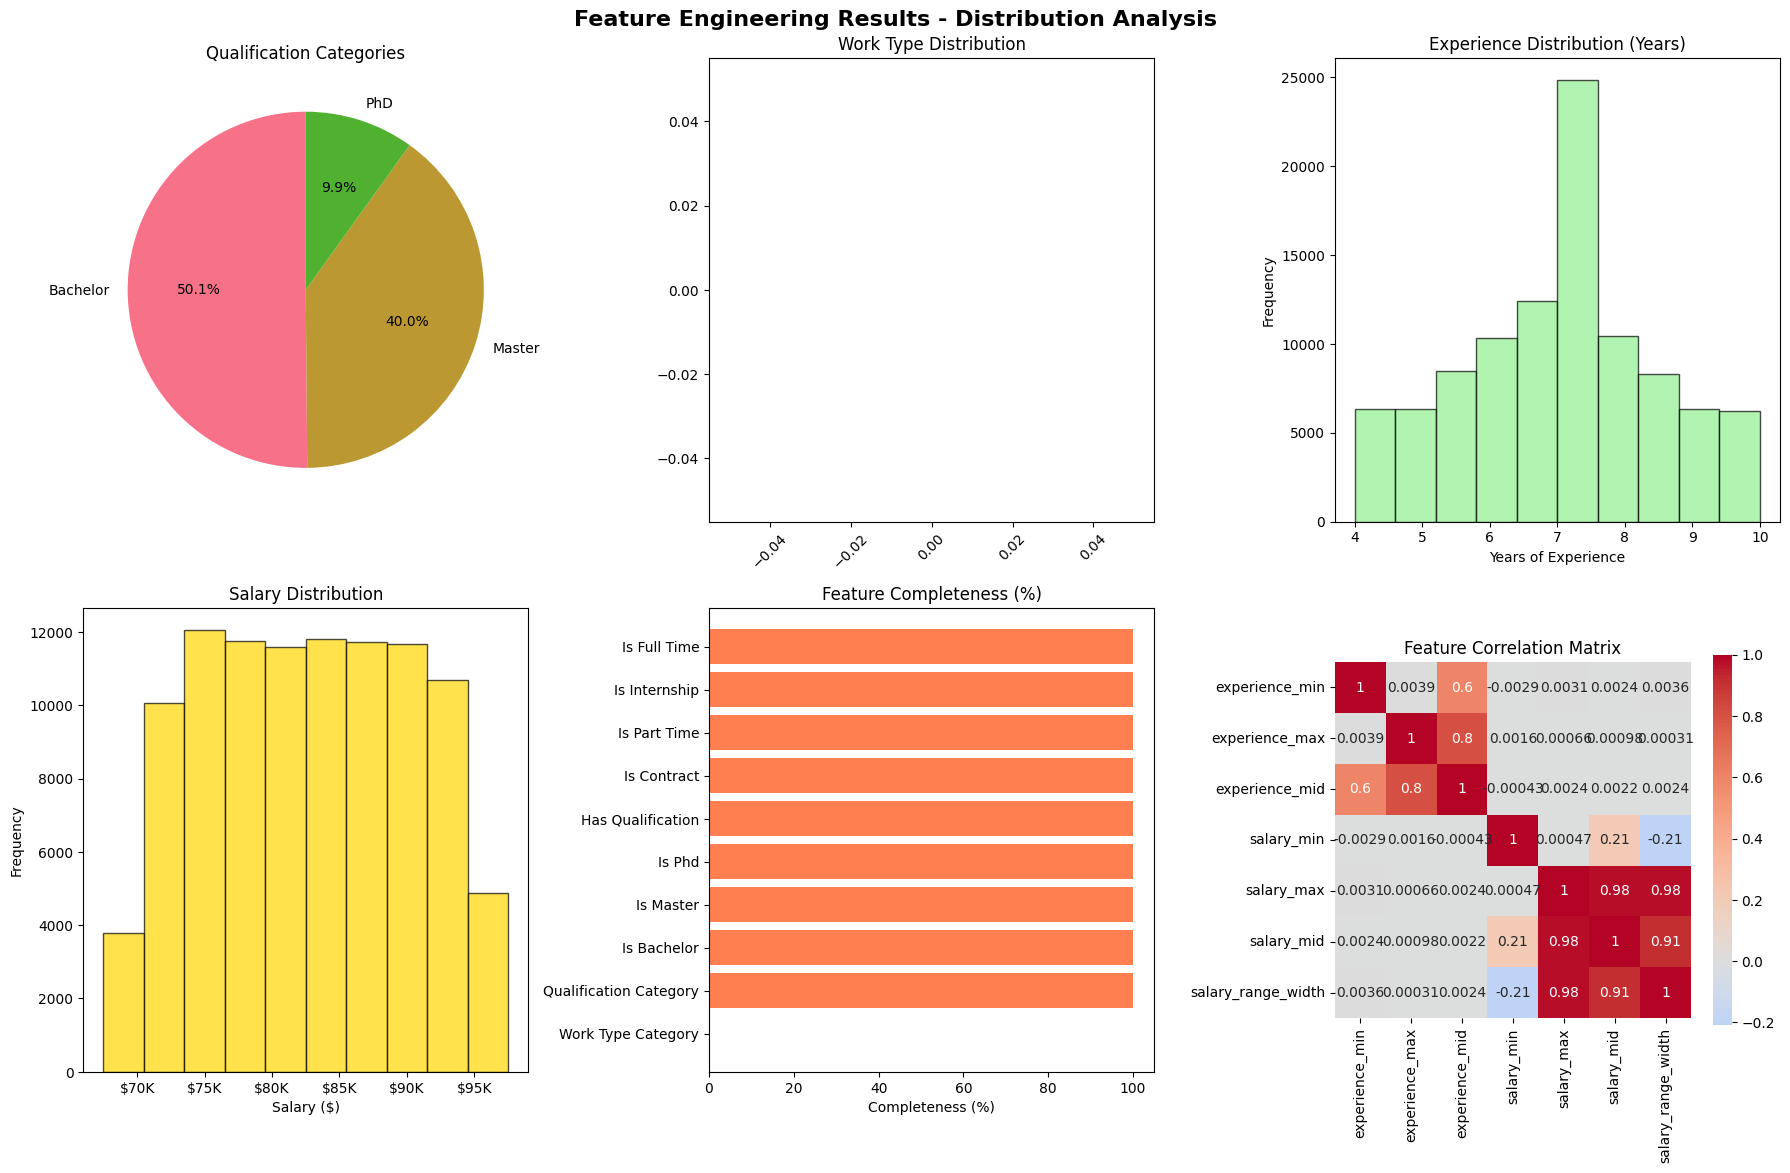

In [12]:
# Create visualizations for the engineered features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Feature Engineering Results - Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Qualification Distribution
if 'qualification_category' in transformed_df.columns:
    qual_counts = transformed_df['qualification_category'].value_counts()
    axes[0, 0].pie(qual_counts.values, labels=qual_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Qualification Categories')

# 2. Work Type Distribution
if 'work_type_category' in transformed_df.columns:
    work_counts = transformed_df['work_type_category'].value_counts()
    axes[0, 1].bar(work_counts.index, work_counts.values, color='skyblue')
    axes[0, 1].set_title('Work Type Distribution')
    axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Experience Distribution
if 'experience_mid' in transformed_df.columns:
    exp_data = transformed_df['experience_mid'].dropna()
    if len(exp_data) > 0:
        axes[0, 2].hist(exp_data, bins=10, color='lightgreen', alpha=0.7, edgecolor='black')
        axes[0, 2].set_title('Experience Distribution (Years)')
        axes[0, 2].set_xlabel('Years of Experience')
        axes[0, 2].set_ylabel('Frequency')

# 4. Salary Distribution
if 'salary_mid' in transformed_df.columns:
    salary_data = transformed_df['salary_mid'].dropna()
    if len(salary_data) > 0:
        axes[1, 0].hist(salary_data, bins=10, color='gold', alpha=0.7, edgecolor='black')
        axes[1, 0].set_title('Salary Distribution')
        axes[1, 0].set_xlabel('Salary ($)')
        axes[1, 0].set_ylabel('Frequency')
        # Format x-axis to show salary in K format
        axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# 5. Feature Completeness
feature_cols = pipeline.get_feature_columns()
completeness = {}
for col in feature_cols[:10]:  # Show top 10 features
    if col in transformed_df.columns:
        completeness[col] = (transformed_df[col].notna().sum() / len(transformed_df)) * 100

if completeness:
    comp_df = pd.Series(completeness).sort_values(ascending=True)
    axes[1, 1].barh(range(len(comp_df)), comp_df.values, color='coral')
    axes[1, 1].set_yticks(range(len(comp_df)))
    axes[1, 1].set_yticklabels([col.replace('_', ' ').title() for col in comp_df.index])
    axes[1, 1].set_title('Feature Completeness (%)')
    axes[1, 1].set_xlabel('Completeness (%)')

# 6. Correlation Heatmap (for numerical features)
numerical_features = []
for col in feature_cols:
    if col in transformed_df.columns and transformed_df[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)

if len(numerical_features) > 1:
    corr_matrix = transformed_df[numerical_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=axes[1, 2], cbar_kws={'shrink': 0.8})
    axes[1, 2].set_title('Feature Correlation Matrix')
else:
    axes[1, 2].text(0.5, 0.5, 'Not enough numerical\nfeatures for correlation', 
                    ha='center', va='center', transform=axes[1, 2].transAxes)
    axes[1, 2].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

## 6. Feature Quality Assessment

In [13]:
print('🔍 FEATURE QUALITY ASSESSMENT')
print('=' * 60)

feature_cols = pipeline.get_feature_columns()
quality_report = []

for col in feature_cols:
    if col in transformed_df.columns:
        # Calculate quality metrics
        total_count = len(transformed_df)
        non_null_count = transformed_df[col].notna().sum()
        completeness = (non_null_count / total_count) * 100
        
        # Uniqueness
        unique_count = transformed_df[col].nunique()
        uniqueness = (unique_count / non_null_count) * 100 if non_null_count > 0 else 0
        
        # Variance (for numerical columns)
        variance = 'N/A'
        if transformed_df[col].dtype in ['int64', 'float64']:
            var_val = transformed_df[col].var()
            variance = f'{var_val:.2f}' if pd.notna(var_val) else 'N/A'
        
        quality_report.append({
            'Feature': col,
            'Type': str(transformed_df[col].dtype),
            'Completeness (%)': f'{completeness:.1f}',
            'Unique Values': unique_count,
            'Uniqueness (%)': f'{uniqueness:.1f}',
            'Variance': variance
        })

# Create quality report DataFrame
quality_df = pd.DataFrame(quality_report)
print('Feature Quality Report:')
print(quality_df.to_string(index=False))

# Identify high-quality features
print('\n🌟 HIGH-QUALITY FEATURES (>80% complete, >10% unique):')
high_quality = []
for _, row in quality_df.iterrows():
    completeness = float(row['Completeness (%)'])
    uniqueness = float(row['Uniqueness (%)'])
    if completeness > 80 and uniqueness > 10:
        high_quality.append(row['Feature'])
        print(f'  ✅ {row["Feature"]} (Complete: {row["Completeness (%)"]}, Unique: {row["Uniqueness (%)"]})')
print(f'\n📊 Summary: {len(high_quality)}/{len(feature_cols)} features meet high-quality criteria')

🔍 FEATURE QUALITY ASSESSMENT
Feature Quality Report:
               Feature    Type Completeness (%)  Unique Values Uniqueness (%)     Variance
qualification_category  object            100.0              3            0.0          N/A
           is_bachelor   int32            100.0              1            0.0          N/A
             is_master   int32            100.0              2            0.0          N/A
                is_phd   int32            100.0              2            0.0          N/A
     has_qualification   int32            100.0              1            0.0          N/A
    work_type_category  object              0.0              0            0.0          N/A
           is_contract   int32            100.0              1            0.0          N/A
          is_part_time   int32            100.0              1            0.0          N/A
         is_internship   int32            100.0              1            0.0          N/A
          is_full_time   int32       

## 7. Export Processed Features

In [14]:
print('💾 EXPORTING PROCESSED FEATURES')
print('=' * 60)

# Create output directory
output_dir = Path('../../dataset')
output_dir.mkdir(exist_ok=True)

# 1. Save complete dataset with all features
complete_path = output_dir / 'dataset_with_features.csv'
transformed_df.to_csv(complete_path, index=False)
print(f'✅ Complete dataset saved: {complete_path}')

# 2. Save only engineered features
features_only_path = output_dir / 'new_features_only.csv'
pipeline.save_features(transformed_df, features_only_path, features_only=True)

# 3. Save high-quality features only
if high_quality:
    hq_features_path = output_dir / 'high_qualityy_features.csv'
    transformed_df[high_quality].to_csv(hq_features_path, index=False)
    print(f'✅ High-quality features saved: {hq_features_path}')

# 4. Save feature metadata
metadata_path = output_dir / 'features_metadata.csv'
quality_df.to_csv(metadata_path, index=False)
print(f'✅ Feature metadata saved: {metadata_path}')

# 5. Save transformation statistics
stats = pipeline.get_transformation_stats()
stats_path = output_dir / 'transformation_statistic.txt'
with open(stats_path, 'w') as f:
    f.write('FEATURE ENGINEERING TRANSFORMATION STATISTICS\n')
    f.write('=' * 60 + '\n\n')
    for transform_name, transform_stats in stats.items():
        f.write(f'{transform_name.upper()} TRANSFORMATION:\n')
        f.write('-' * 30 + '\n')
        for key, value in transform_stats.items():
            f.write(f'{key}: {value}\n')
        f.write('\n')
print(f'✅ Transformation statistics saved: {stats_path}')

print(f'\n📁 All outputs saved to: {output_dir.absolute()}')
print(f'📊 Files created:')
for file_path in output_dir.glob('*'):
    size_kb = file_path.stat().st_size / 1024
    print(f'  - {file_path.name} ({size_kb:.1f} KB)')

💾 EXPORTING PROCESSED FEATURES
✅ Complete dataset saved: ..\..\dataset\dataset_with_features.csv
Features saved to: ..\..\dataset\new_features_only.csv
✅ Feature metadata saved: ..\..\dataset\features_metadata.csv
✅ Transformation statistics saved: ..\..\dataset\transformation_statistic.txt

📁 All outputs saved to: d:\ai courses\JobHunt\ai_model\notebooks\..\..\dataset
📊 Files created:
  - complete_dataset10k.csv (11694.8 KB)
  - complete_dataset_with_features.csv (116831.5 KB)
  - dataset_with_features.csv (127708.1 KB)
  - engineered_features_only.csv (11574.9 KB)
  - features_metadata.csv (1.1 KB)
  - feature_metadata.csv (1.1 KB)
  - job_descriptions_100k_sample.csv (105256.6 KB)
  - new_features_only.csv (22451.4 KB)
  - transformation_statistic.txt (2.1 KB)
  - transformation_statistics.txt (2.1 KB)


## 8. Summary and Next Steps

### 🎯 **What We Accomplished:**

1. **✅ Individual Module Testing**: Tested each feature engineering component separately
2. **✅ Complete Pipeline**: Demonstrated the full `FeatureEngineeringPipeline`
3. **✅ Feature Analysis**: Analyzed feature quality and distributions
4. **✅ Visualization**: Created comprehensive plots for feature understanding
5. **✅ Quality Assessment**: Identified high-quality features for modeling
6. **✅ Export**: Saved processed features and metadata for future use

### 🚀 **Next Steps:**

1. **Model Training**: Use the engineered features for machine learning models
2. **Feature Selection**: Apply feature selection techniques to identify the most important features
3. **Pipeline Integration**: Integrate this pipeline into your production workflow
4. **Monitoring**: Set up monitoring for feature drift and quality degradation
5. **Optimization**: Fine-tune feature engineering based on model performance

### 📚 **Key Takeaways:**

- The feature engineering pipeline is **modular** and **reusable**
- Each transformation handles **missing data** gracefully
- The pipeline provides **comprehensive statistics** for monitoring
- Features are **well-documented** and **interpretable**
- The system is **production-ready** with proper error handling